# Univariate,Bivariate and MultiVariate Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
os.chdir("E:\\Profond AI\\ML algorithms\\linear-housepricingdata")
data=pd.read_csv("data.csv")

In [8]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
os.chdir("E:\\Profond AI\\Python\\Python")
df=pd.read_csv("train.csv")

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Univariate Analysis

Univariate analysis is also used to highlight missing and outlier values. In the upcoming part of this series, we will look at methods to handle missing and outlier values.

Text(0, 0.5, 'Y label')

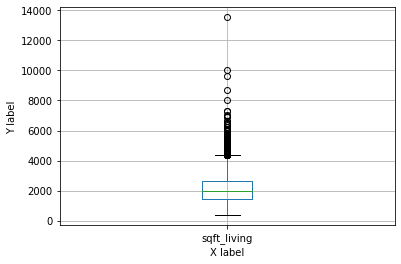

In [4]:
#to find the outlier
fig = data.boxplot(column='sqft_living')
fig.set_title('')
fig.set_xlabel('X label')
fig.set_ylabel('Y label')

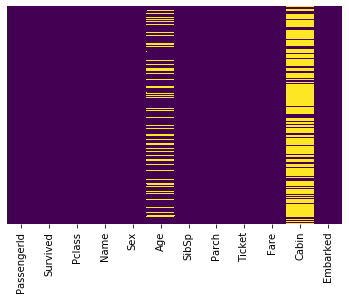

In [6]:
#to find the missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

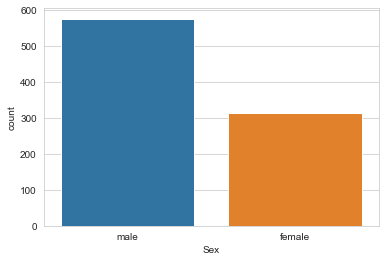

In [10]:
#for catagorical Variable
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=df)

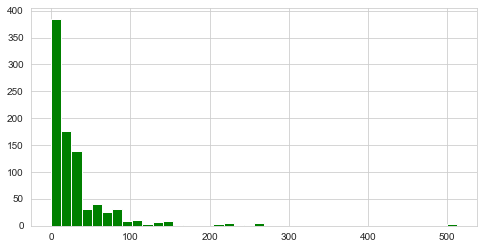

In [11]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

## Bivariate Analysis

Bi-variate Analysis finds out the relationship between two variables.We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. Different methods are used to tackle these combinations during analysis process.

**1. Continuous & Continuous**
* To find the strength of the relationship, we use Correlation. Correlation varies between -1 and +1.

    * -1: perfect negative linear correlation
    * +1:perfect positive linear correlation and 
    * 0: No correlation

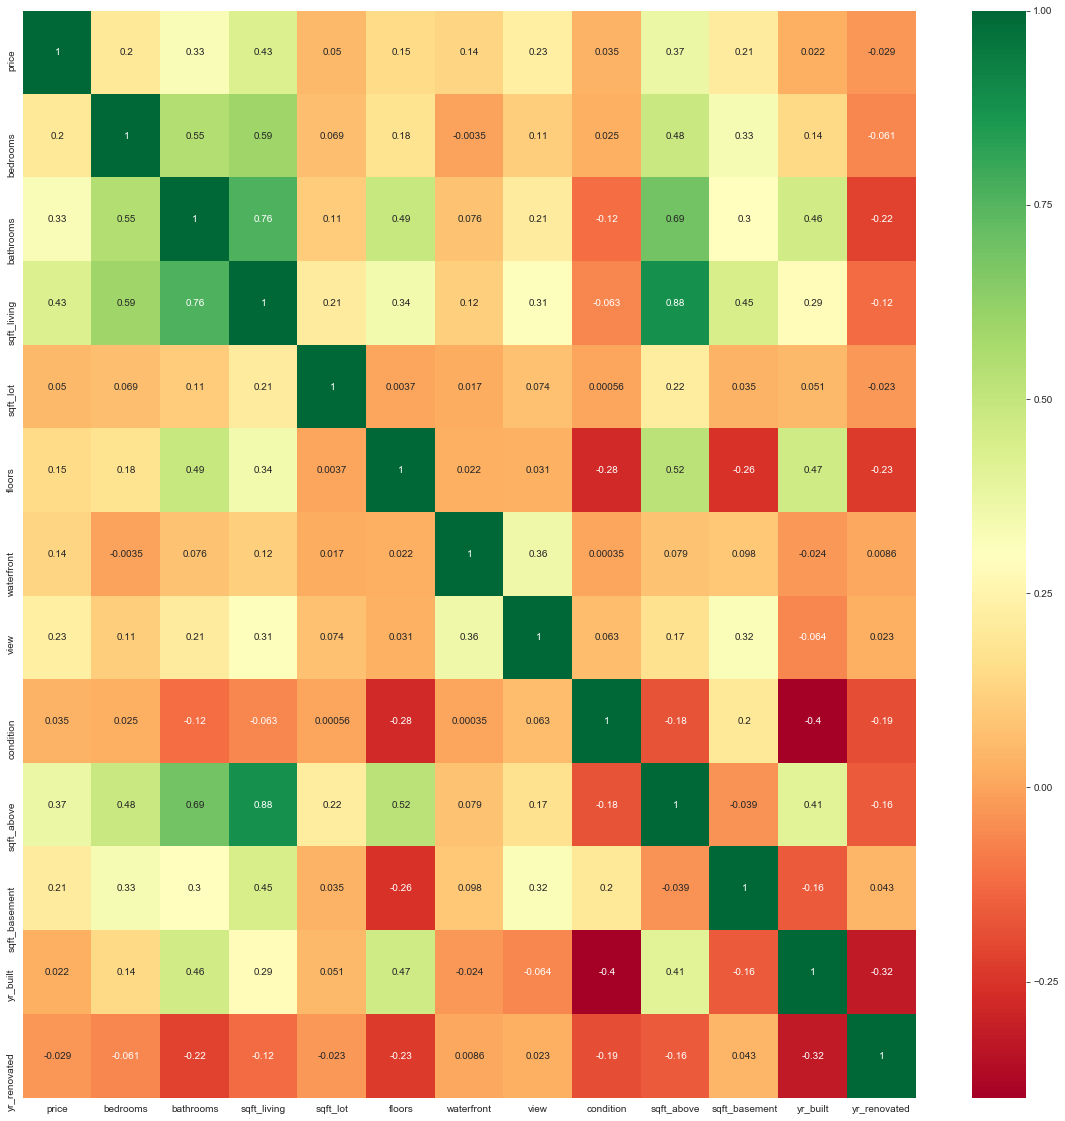

In [12]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**2. Categorical & Categorical:**
* Chi-Square Test: This test is used to derive the statistical significance of relationship between the variables. Also, it tests whether the evidence in the sample is strong enough to generalize that the relationship for a larger population as well.

In [21]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [22]:
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)



cT = ChiSquare(data)

In [23]:
cT.TestIndependence(colX='country',colY="price")

country is NOT an important predictor. (Discard country from model)


**3. Categorical & Continuous:**
* ANOVA:- It assesses whether the average of more than two groups is statistically different.

In [25]:
#Anova test
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('country ~ price',data=data).fit()

In [26]:
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

                sum_sq      df            F  PR(>F)
price     3.928889e-28     1.0  4358.042006     0.0
Residual  4.145218e-28  4598.0          NaN     NaN


## Multivariate Analysis

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


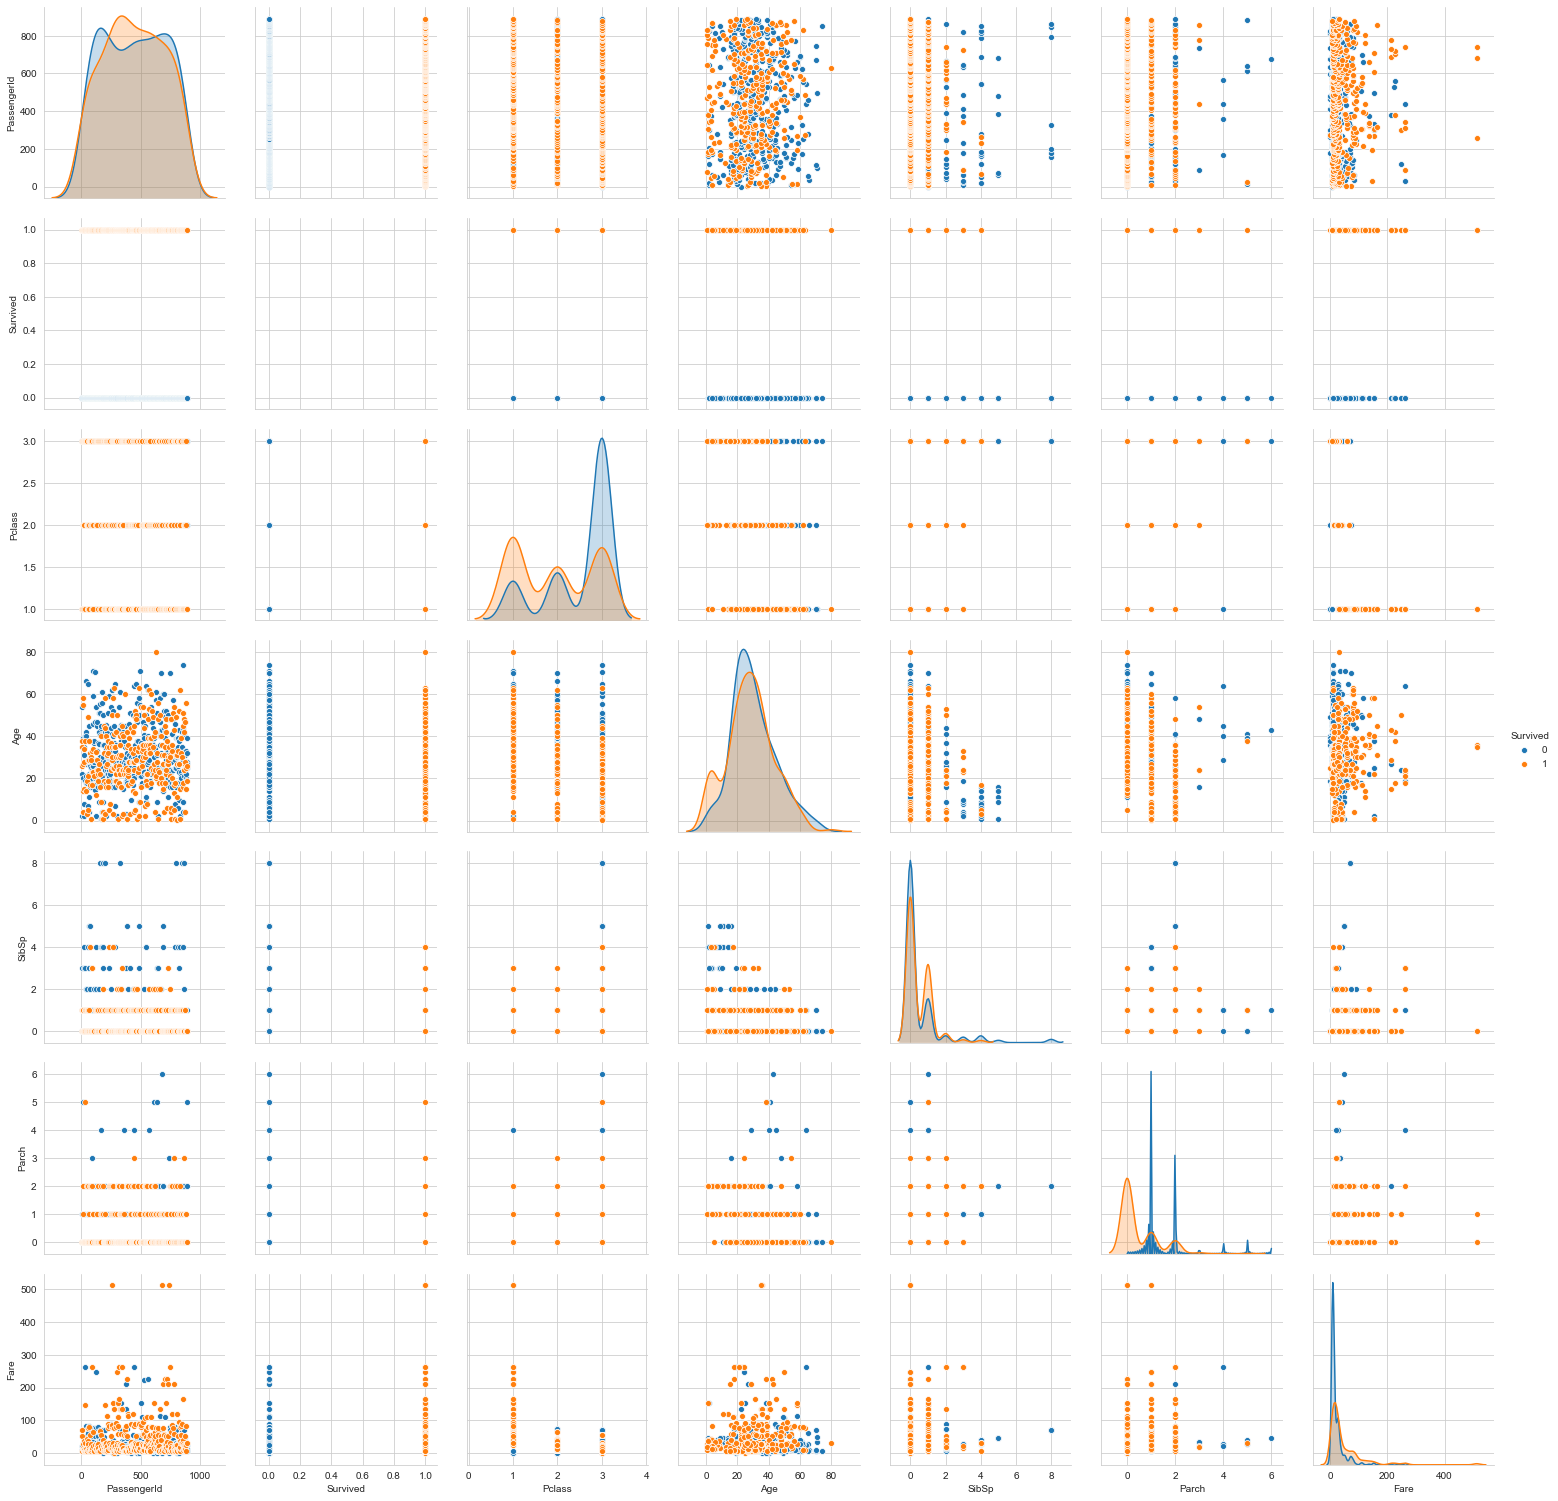

In [27]:
sns.pairplot(df,hue="Survived",size=3)